In [40]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [42]:
train = pd.read_csv("termdeposit_test.csv")
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [29]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [30]:
train.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [31]:
#checking Dimension of Train & Test data

print("In Train dataset we have {} rows & {} columns".format(*train.shape))

In Train dataset we have 13564 rows & 17 columns


In [32]:
# Column Names in Train & Test Dataset

print("These are the columns present in TRAIN dataset: \n",train.columns)

These are the columns present in TRAIN dataset: 
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [33]:
#Seaparating Categrocial columns in train Dataframe
cat_col = train.select_dtypes(include='object').columns
print("Categorial columns in our train dataframe:\n",cat_col)

Categorial columns in our train dataframe:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [35]:
# Checking Value Counts of Categorical Column(Train Data)
cat_col = cat_col[:-1]

for col in cat_col:
    print('*'*10,col,'*'*10)
    print(train[col].value_counts())
    print("\n")

********** job **********
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


********** marital **********
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


********** education **********
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


********** default **********
no     13334
yes      230
Name: default, dtype: int64


********** housing **********
yes    7546
no     6018
Name: housing, dtype: int64


********** loan **********
no     11451
yes     2113
Name: loan, dtype: int64


********** contact **********
cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64


********** month **********
may    4097
jul    2051
aug    1914
jun    16

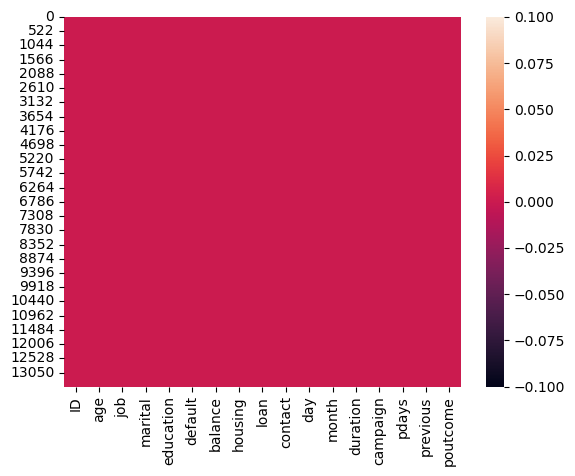

In [47]:
#Visualizing it
sns.heatmap(train.isnull())
plt.show()

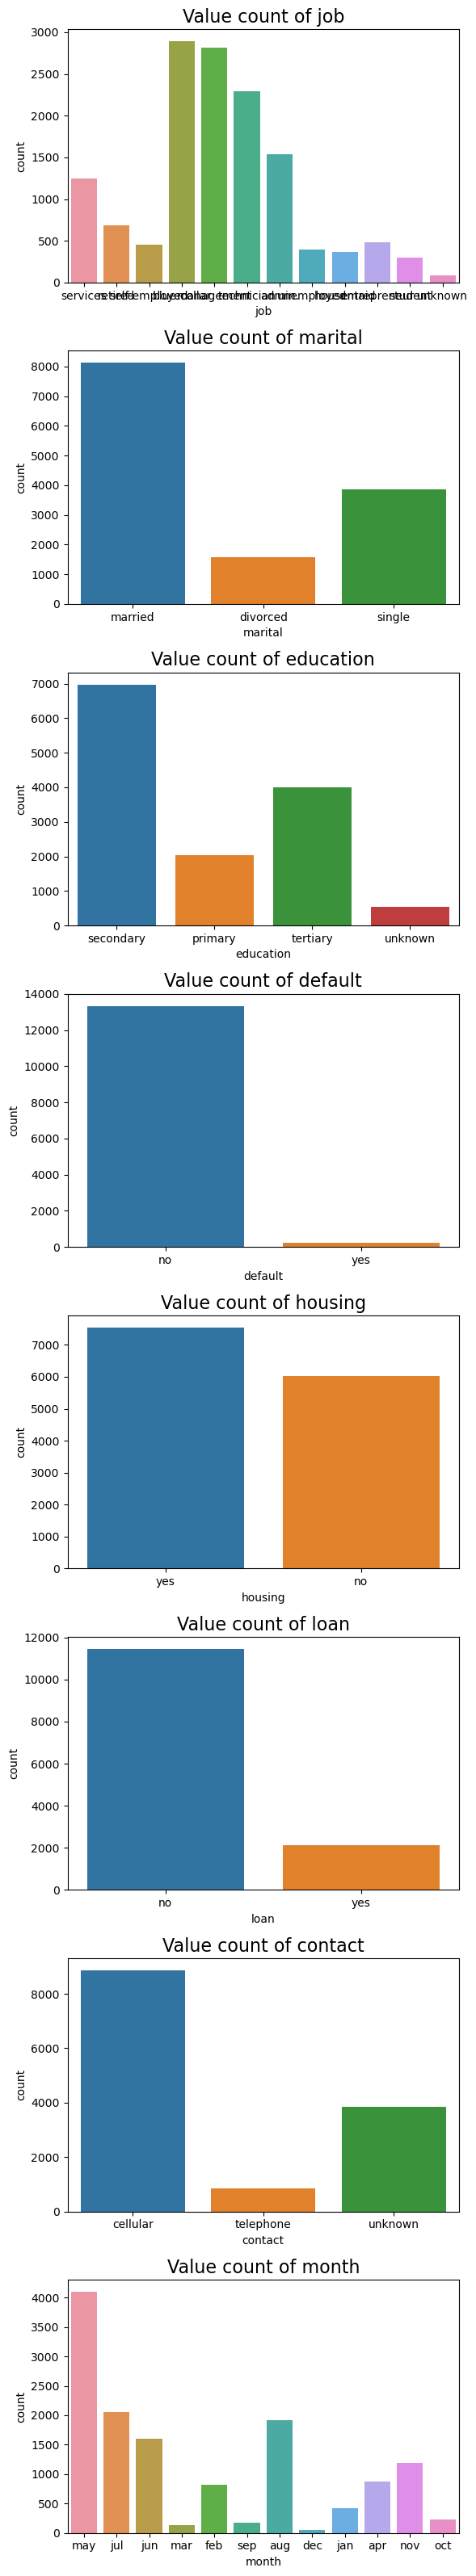

In [48]:
#Visualizing it

# Create subplots
fig, axes = plt.subplots(len(cat_col), 1, figsize=(6, 4*len(cat_col)))

# Iterate through categorical columns
for i, column in enumerate(cat_col):
    # Count plot
    sns.countplot(x=column, data=train, ax=axes[i])
    axes[i].set_title(f"Value count of {column}", fontsize=16)

plt.tight_layout()
plt.show()

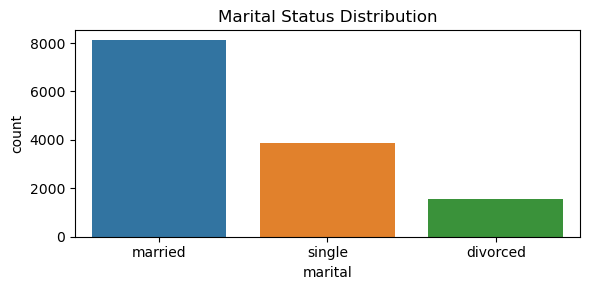

In [49]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train, x='marital', order = train['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

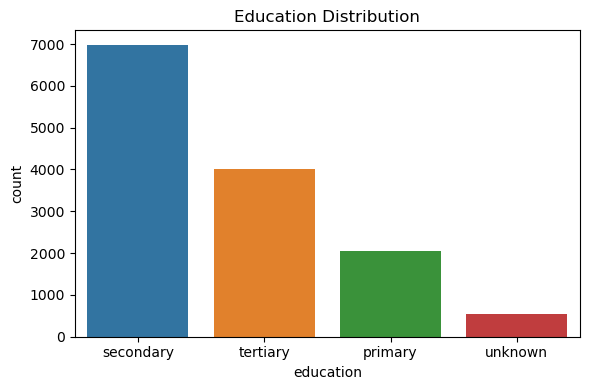

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='education', order = train['education'].value_counts().index)
plt.title('Education Distribution')
plt.tight_layout()
plt.show()

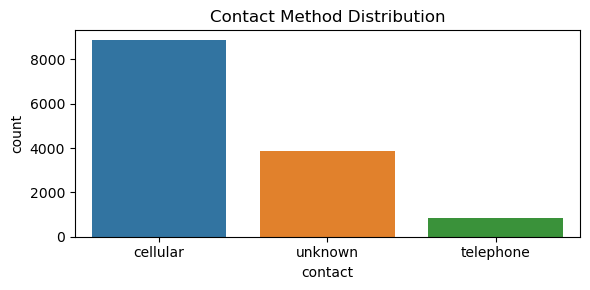

In [51]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train, x='contact', order = train['contact'].value_counts().index)
plt.title('Contact Method Distribution')
plt.tight_layout()
plt.show()

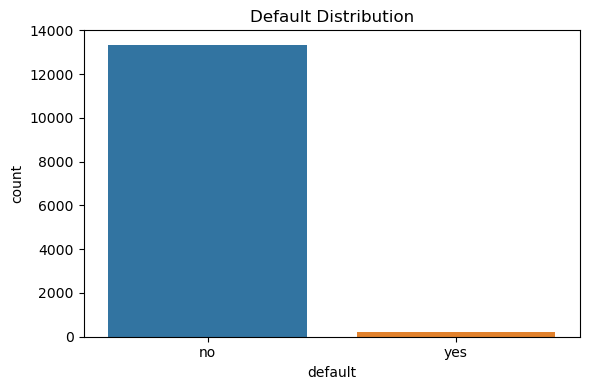

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='default', order = train['default'].value_counts().index)
plt.title('Default Distribution')
plt.tight_layout()
plt.show()

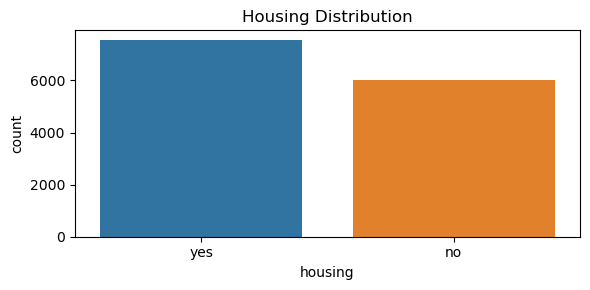

In [53]:
plt.figure(figsize=(6,3))
sns.countplot(data=train, x='housing', order = train['housing'].value_counts().index)
plt.title('Housing Distribution')
plt.tight_layout()
plt.show()

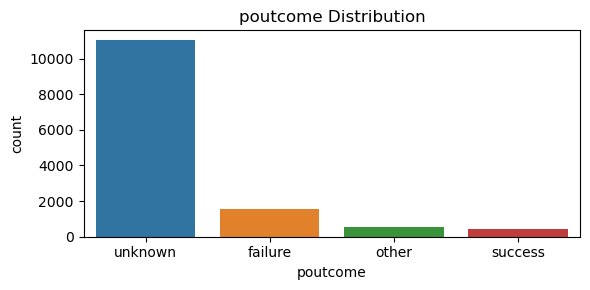

In [54]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train, x='poutcome', order = train['poutcome'].value_counts().index)
plt.title('poutcome Distribution')
plt.tight_layout()
plt.show()

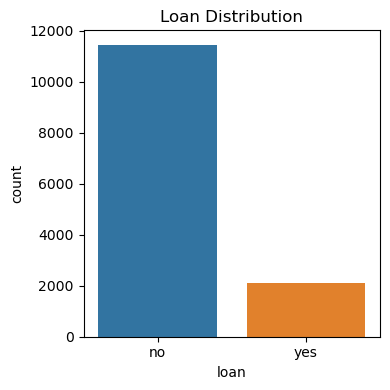

In [55]:
plt.figure(figsize=(4, 4))
sns.countplot(data=train, x='loan', order = train['loan'].value_counts().index)
plt.title('Loan Distribution')
plt.tight_layout()
plt.show()

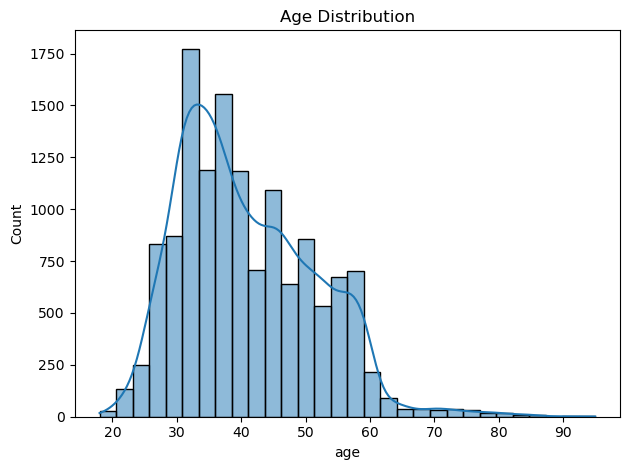

In [56]:
sns.histplot(train['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

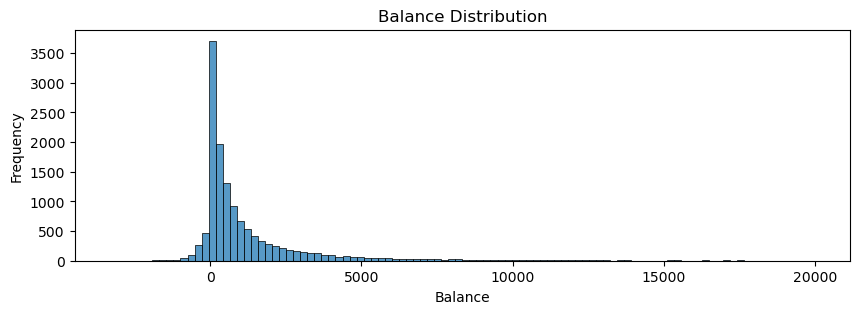

In [57]:
plt.figure(figsize=(10, 3))
sns.histplot(train[train['balance'] < 20000]['balance'], bins=100, kde=False)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

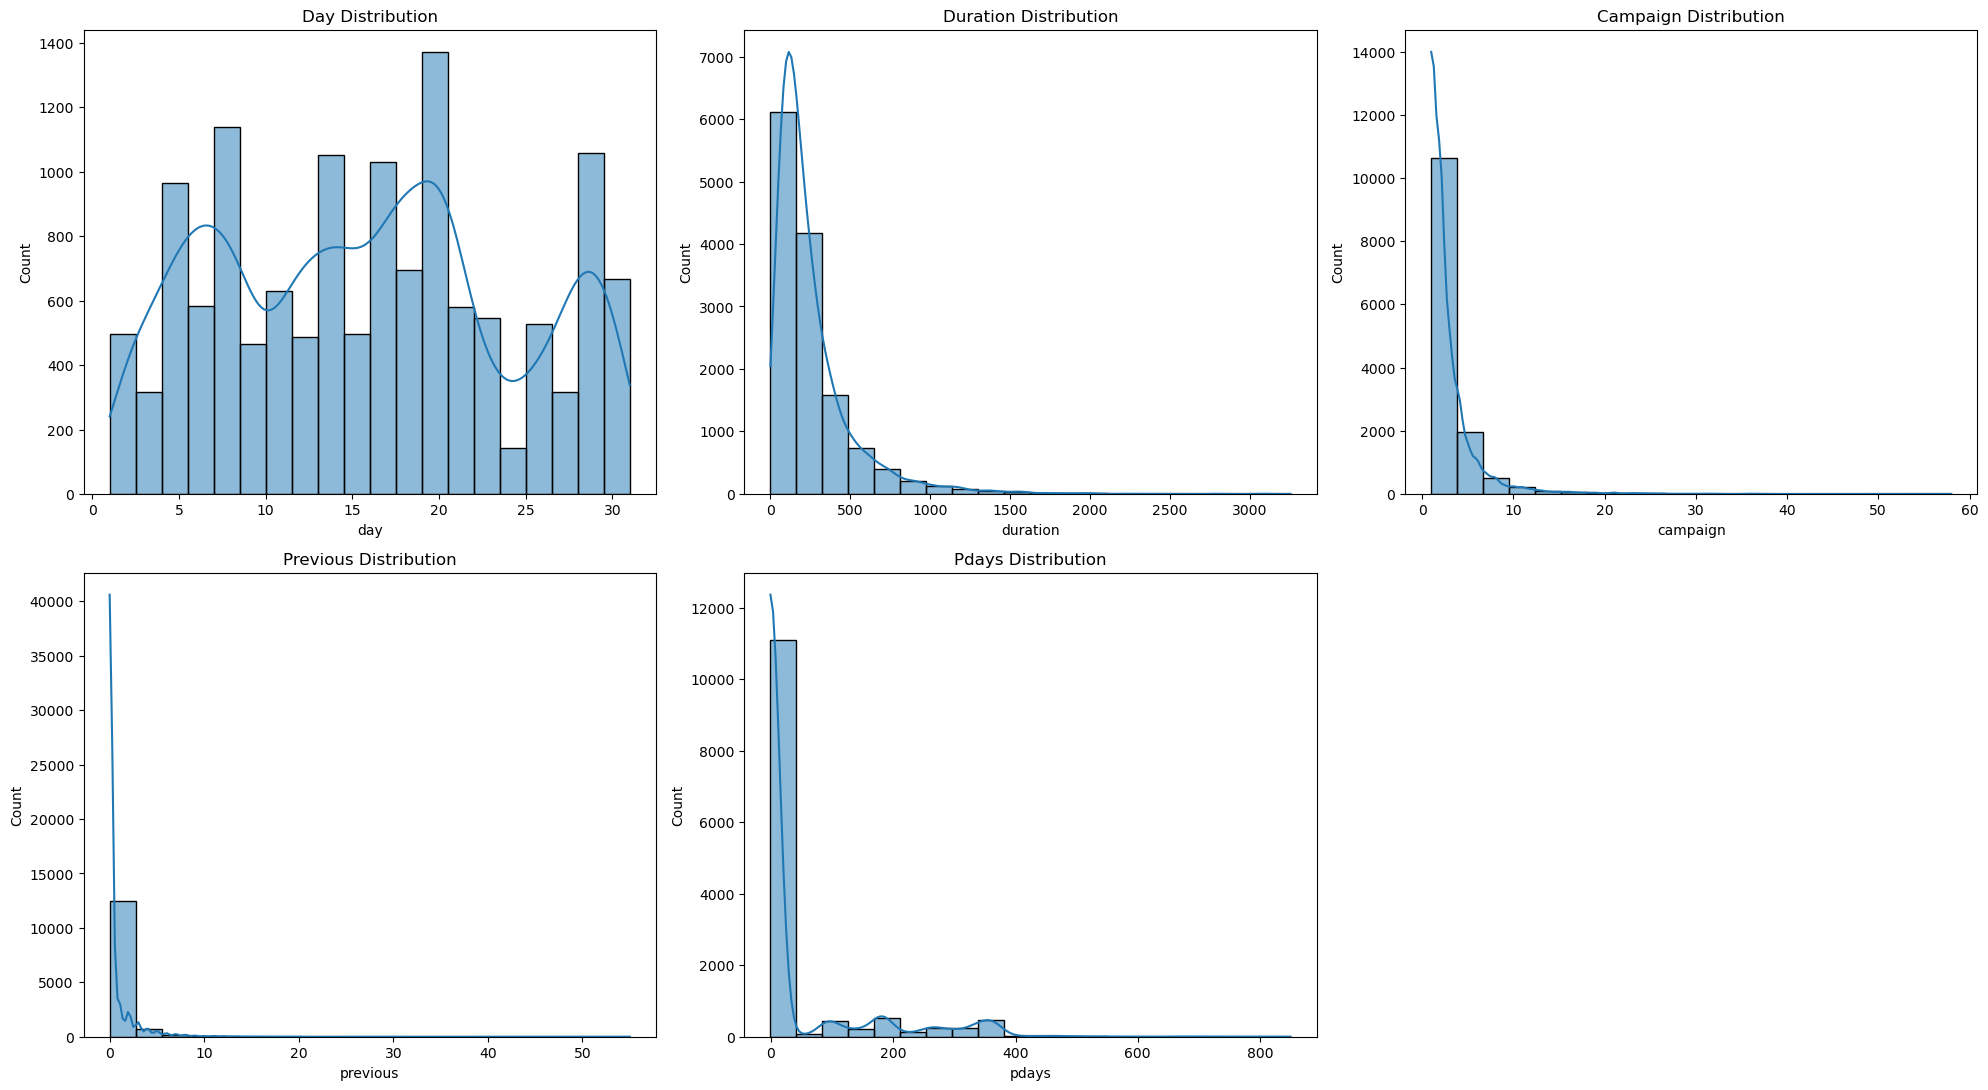

In [58]:
features = ['day', 'duration', 'campaign', 'previous', 'pdays']

plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(train[feature], bins=20, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()

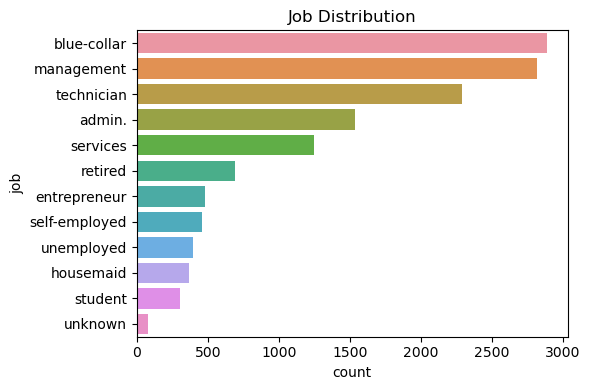

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, y='job', order = train['job'].value_counts().index)
plt.title('Job Distribution')
plt.tight_layout()
plt.show()

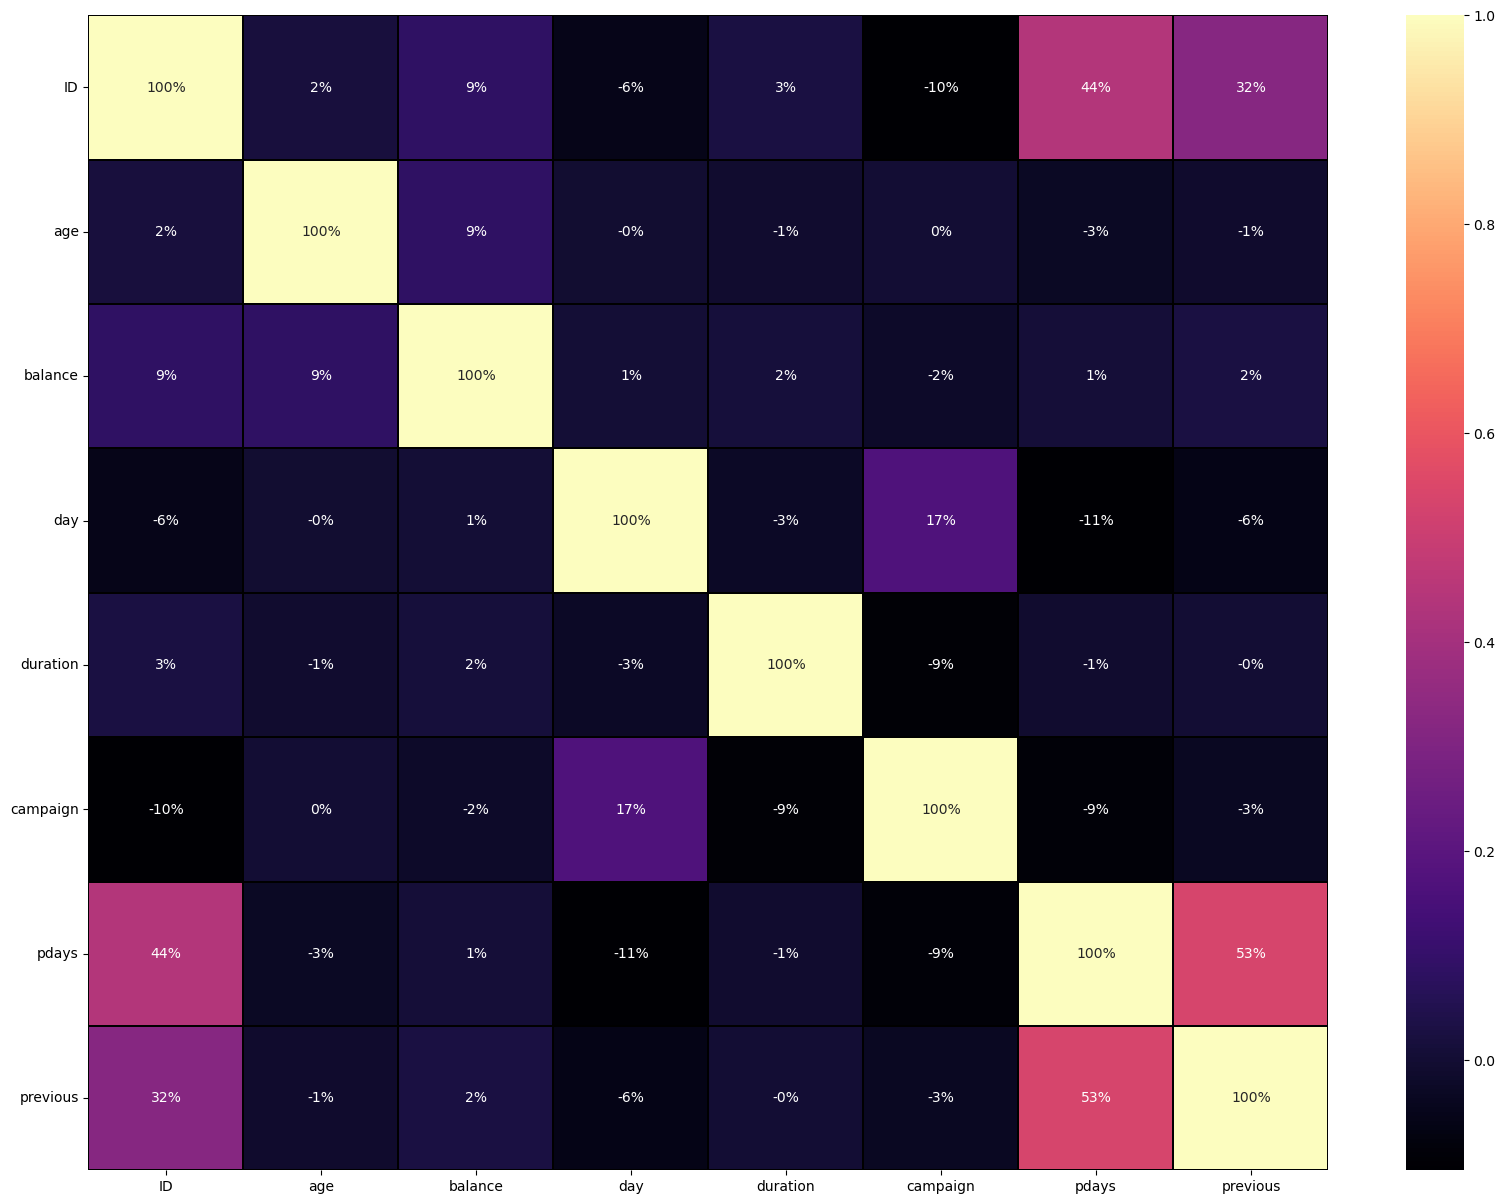

In [65]:
plt.figure(figsize = (20,15))
sns.heatmap(train.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'magma')
plt.yticks(rotation=0)
plt.show()